# Distributions and Sampling

In [1]:
# Early imports, to get these out of the way
from scipy import stats

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Initial Concepts

### Discrete vs. Continuous Variables and their Distributions

A fundamental distinction among kinds of distributions is the distinction between discrete and continuous distributions. 

A **discrete distribution** (or variable) takes on countable values, like integers, where every outcome has a positive probability.

A **continuous distribution** takes on a continuum of values, like real numbers. It assigns probabilities to ranges of values (not any one single value)

![](https://miro.medium.com/max/1022/1*7DwXV_h_t7_-TkLAImKBaQ.png)

[More Explanation](https://mathbitsnotebook.com/Algebra1/FunctionGraphs/FNGContinuousDiscrete.html)

### Center, Spread and Shape

You can then start to think about how to describe distributions.

More specifically, the **center** refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

The **spread** refers loosely to how far away the more extreme values are from the center, and is measured by some value showing variation - more precisely by the standard deviation, which is effectively a measure of the average distance away from the mean.

![different spread representations](images/examplesOfSpread.jpg)

The **shape** refers loosely how the data shows up when visualized, more specifically capturing details like symmetry or skew, as well as the number of peaks in the distribution.

![different distribution shapes](images/shapesOfDistributions.jpg)

Note that sometimes the center of your distribution is harder to capture precisely, if the shape is skewed:

![examples of skewed distributions](images/order_of_mean_median_mode.png)

[Image Source for the images in this cell](http://mathcenter.oxford.emory.edu/site/math117/shapeCenterAndSpread/)

## Probability Distribution Functions

### Probability Mass Functions (PMF) / Probability Density Functions (PDF) & Cumulative Density Functions (CDF)

(I know, "Probability Distribution Functions" and "Probability Density Functions" have the same acronym. PDF normally stands for the latter - the former is a more catch-all term for all three of these)

![example graphs of a continuous cdf with corresponding pdf and discrete cdf with corresponding pmf](images/pmf-pdf-cdf.png)

[Image Source](https://stats.stackexchange.com/questions/107563/do-the-pdf-and-the-pmf-and-the-cdf-contain-the-same-information)

## Distribution Types

### Bernoulli Distribution 

The **Bernoulli** distribution shows the outcome of a single trial where there are only 2 possible options.

The easiest example is a single coin flip of a fair coin.

In [2]:
possible_flips = ['Tails', 'Heads']
possible_flips

['Tails', 'Heads']

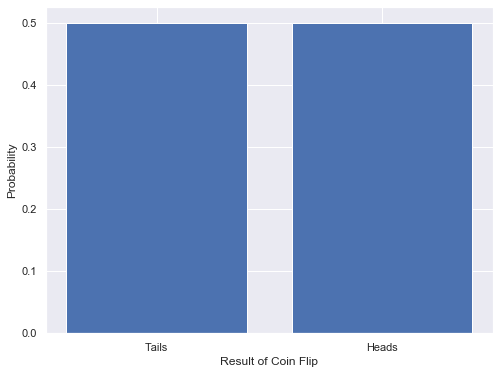

In [3]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(possible_flips, height=(1/2))

plt.xlabel('Result of Coin Flip')
plt.ylabel('Probability')

plt.show()

In [4]:
# since it's only 2 things, just creating the dict here
cdf_flip = {'Tails':.5, 'Heads':1}

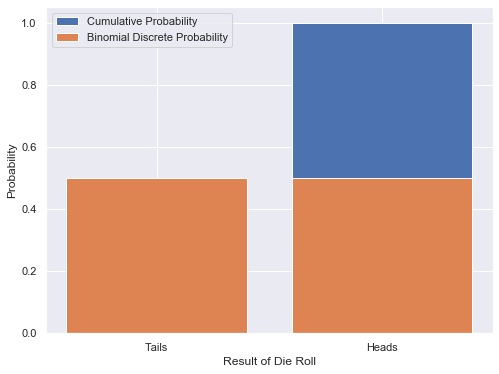

In [5]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(cdf_flip.keys(), height=cdf_flip.values(), label='Cumulative Probability')
plt.bar(possible_flips, height=(1/2), label='Binomial Discrete Probability')

plt.xlabel('Result of Die Roll')
plt.ylabel('Probability')

plt.legend()
plt.show()

A note - Bernoulli distributions do not need to showcase a fair and balanced trial, as was the case above. Let's look really quickly at a game where the chance of winning is only 10%:

In [6]:
possible_outcomes = {'Lose':.9, 'Win':.1}
possible_outcomes

{'Lose': 0.9, 'Win': 0.1}

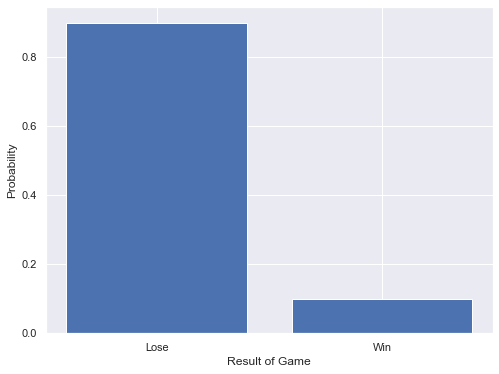

In [7]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(possible_outcomes.keys(), height=possible_outcomes.values())

plt.xlabel('Result of Game')
plt.ylabel('Probability')

plt.show()

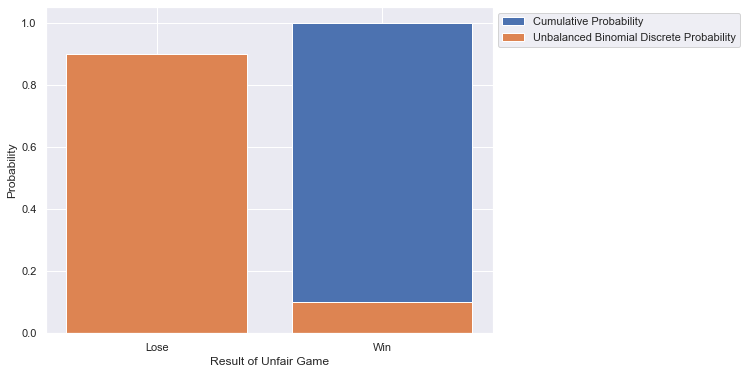

In [8]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(possible_outcomes.keys(), height=[.9,1], label='Cumulative Probability')
plt.bar(possible_outcomes.keys(), height=possible_outcomes.values(), label='Unbalanced Binomial Discrete Probability')

plt.xlabel('Result of Unfair Game')
plt.ylabel('Probability')

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Another note - a Bernoulli distribution is not the same as a **Binomial** distribution.

- Bernoulli shows the probable results of a single trial with only 2 outcomes
- Binomial shows the probable summed results of MANY trials with only 2 outcomes

### Uniform

The **Uniform** distribution applies when all possible values of the variable are _equally probable_. 

If I'm rolling a fair die, then the six possible outcomes are all equally probable. That is, the chance that I roll a 1 is 1 in 6, as is the chance that I roll a 2 etc.

In [9]:
possible_rolls = list(range(1,7))
possible_rolls

[1, 2, 3, 4, 5, 6]

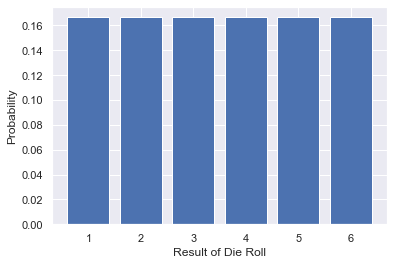

In [10]:
# visualize it
plt.bar(possible_rolls, height=(1/6))

plt.xlabel('Result of Die Roll')
plt.ylabel('Probability')

plt.show()

In [11]:
# using dictionary comprehension (!!) to get the CDF
cdf_roll = {roll: (roll/6) for roll in possible_rolls}
cdf_roll

{1: 0.16666666666666666,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.6666666666666666,
 5: 0.8333333333333334,
 6: 1.0}

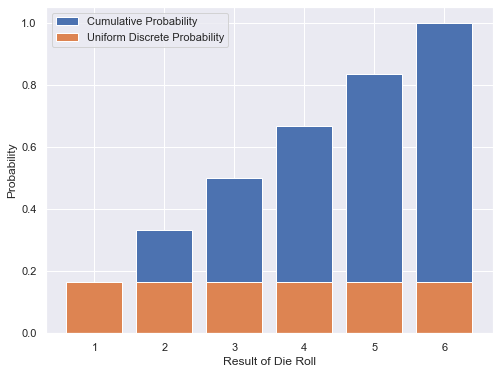

In [12]:
# visualize it
plt.figure(figsize=(8,6))
plt.bar(cdf_roll.keys(), height=cdf_roll.values(), label='Cumulative Probability')
plt.bar(possible_rolls, height=(1/6), label='Uniform Discrete Probability')

plt.xlabel('Result of Die Roll')
plt.ylabel('Probability')

plt.legend()
plt.show()

### Standard Normal Distribution (Gaussian)

<img src='https://github.com/learn-co-students/dsc-0-09-12-gaussian-distributions-online-ds-ft-031119/blob/master/normalsd.jpg?raw=true' width=700/>

[Practice](https://www.intmath.com/counting-probability/normal-distribution-graph-interactive.php)

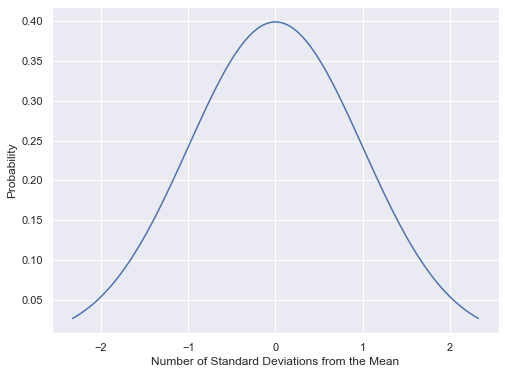

In [13]:
# Getting our normal distribution PDF,
# as shown in an example in the scipy.stats.norm documentation
x = np.linspace(stats.norm.ppf(0.01),
                stats.norm.ppf(0.99), 100)

# visualize it
plt.figure(figsize=(8,6))

plt.plot(x, stats.norm.pdf(x))

plt.xlabel('Number of Standard Deviations from the Mean')
plt.ylabel('Probability')

plt.show()

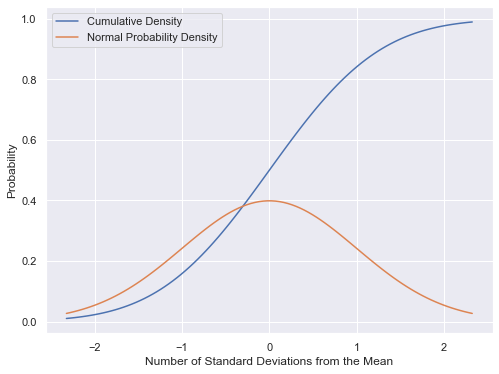

In [14]:
plt.figure(figsize=(8,6))

plt.plot(x, stats.norm.cdf(x), label="Cumulative Density")
plt.plot(x, stats.norm.pdf(x), label="Normal Probability Density")

plt.xlabel('Number of Standard Deviations from the Mean')
plt.ylabel('Probability')

plt.legend()
plt.show()

#### Z-Score 

When working with normal distributions, you can calculate the **z-score** for a specific point, which is just the number of standard deviations the point is away from the mean:

$$z = \frac{x-\mu}{\sigma}$$ 


### But that's not all...

![](images/distributiontypes.png)

[Image Source](https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7)

# Sampling & Point Estimates 

> The sample statistic is calculated from the sample data and the population parameter is inferred (or estimated) from this sample statistic. Let me say that again: Statistics are calculated, parameters are estimated. - James Jones

**Know the differences - Population v Sample Terminology**

Characteristics of populations are called *parameters*<br/>
Characteristics of a sample are called *statistics*

<img src="https://media.cheggcdn.com/media/7ac/7ac1a812-3b41-4873-8413-b6a7b8fab530/CL-26481V_image_006.png" width=700>

Let's work through an example to understand this topic better. We grabbed wage and classification information for 11,782 City of Seattle Employees (as of November 2020).

Details: https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd

In [15]:
!ls data

City_of_Seattle_Wage_Data.csv probability_playlists
Mushrooms_cleaned.csv


In [16]:
# Grab our data
df = pd.read_csv('data/City_of_Seattle_Wage_Data.csv')
display(df.head())
display(df.info())

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Police Department,Aagard,Lori,Pol Lieut,80.07
1,Police Department,Aakervik,Dag,Pol Ofcr-Detective,60.84
2,Parks & Recreation,Aamot,Allison,Rec Attendant *,17.35
3,Seattle Public Utilities,Aar,Abdimallik,"Civil Engrng Spec,Sr",54.07
4,Parks & Recreation,Aban,Eduardo,"Civil Engr,Sr",58.36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11782 entries, 0 to 11781
Data columns (total 5 columns):
Department      11782 non-null object
Last Name       11782 non-null object
First Name      11782 non-null object
Job Title       11782 non-null object
Hourly Rate     11782 non-null float64
dtypes: float64(1), object(4)
memory usage: 460.4+ KB


None

In [17]:
# Thing to note - the column name 'Hourly Rate ' has a space at the end
df.columns

Index(['Department', 'Last Name', 'First Name', 'Job Title', 'Hourly Rate '], dtype='object')

In [18]:
# renaming columns
col_names = [c.replace(" ", "") for c in df.columns.to_list()]
col_names

['Department', 'LastName', 'FirstName', 'JobTitle', 'HourlyRate']

In [19]:
# check our work
col_map = dict(zip(df.columns.to_list(), col_names))
col_map

{'Department': 'Department',
 'Last Name': 'LastName',
 'First Name': 'FirstName',
 'Job Title': 'JobTitle',
 'Hourly Rate ': 'HourlyRate'}

In [20]:
df = df.rename(columns=col_map)

In [21]:
df.columns

Index(['Department', 'LastName', 'FirstName', 'JobTitle', 'HourlyRate'], dtype='object')

What we'll do is grab a random sample, of 500 employees, and see how the sample statistics match up with our population parameters.

In [22]:
# gonna use the random library to add randomness
import random

# seed for reproducibility (not too random)
random.seed(100) 

In [23]:
# set our parameters
sample_size = 500
total_employees = len(df)

In [24]:
df.index

RangeIndex(start=0, stop=11782, step=1)

In [25]:
#Pick 500 random employees by index number
random_ints = random.sample(range(total_employees), sample_size)

# then create our sample
sample = df.iloc[random_ints]

In [26]:
sample.head()

,Department,LastName,FirstName,JobTitle,HourlyRate
2386,Construction & Inspections,Cummings,Brandon,Land Use Plnr III,50.6800
7528,Human Services Department,Mulugeta,Genet,Actg Tech II-BU,29.2900
7453,Community Police Commission,Morris,Shayleen,"StratAdvsr2,Exempt",52.6819
2863,Information Technology,Dotson,Pamela,"Publc Relations Spec,Sr",43.6200
11559,Fire Department,Wyatt,Keith,"Fire Lieut, Sr-Prev Inspector",65.8100


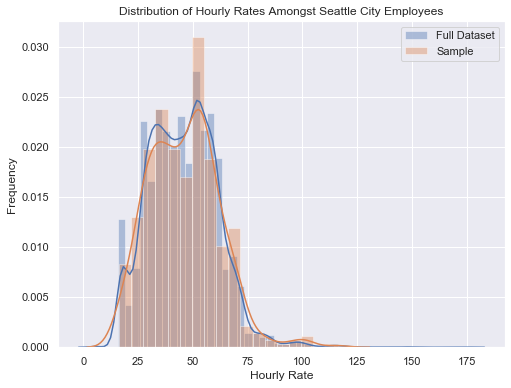

In [27]:
#Make a visualization that shows the distribution of hourly rate

plt.figure(figsize=(8,6))

sns.distplot(df['HourlyRate'], label='Full Dataset')
sns.distplot(sample['HourlyRate'], label='Sample')

plt.ylabel("Frequency")
plt.xlabel("Hourly Rate")

plt.title("Distribution of Hourly Rates Amongst Seattle City Employees")
plt.legend()
plt.show()

Another comparison: 

In [28]:
print("Full Dataset:")
print(df.describe())
print("*" * 20)
print("Sample:")
print(sample.describe())

Full Dataset:
         HourlyRate
count  11782.000000
mean      45.730573
std       15.544385
min        5.530000
25%       33.680000
50%       45.540000
75%       56.390000
max      175.450000
********************
Sample:
       HourlyRate
count  500.000000
mean    46.077363
std     15.855797
min     16.390000
25%     33.680000
50%     46.178000
75%     56.380750
max    116.038000


So, how'd our sample do?

- 


## Additional Resources

THERE ARE SO MANY.

- [This YouTube explainer from ZedStatistics, on Probability Distribution Functions](https://www.youtube.com/watch?v=YXLVjCKVP7U)
- [This DataCamp tutorial walks through many more distribution examples in Python](https://www.datacamp.com/community/tutorials/probability-distributions-python)
- [This KDNuggets Blog walks through many different distributions and their uses](https://www.kdnuggets.com/2020/06/overview-data-distributions.html)
- More of a general stats resource: [HackerRank's 10 Days of Statistics](https://www.hackerrank.com/domains/tutorials/10-days-of-statistics)
- [Penn State's Stats Course on Introduction to Probability Theory](https://online.stat.psu.edu/stat414/), which very thoroughly discusses different distributions as well as probability